# Paris Subway Ridership Data Prediction
### clean data and concatenate to pandas dataframe

1. 2015 French Open: May 24 (SUN) – Jun 7
2. 2016 French Open: May 22 (SUN) – Jun 5
3. 2017 French Open: May 28 (SUN) – Jun 11
4. 2018 French Open: May 27 (SUN) – Jun 10
5. 2019 French Open: May 26 (SUN) – Jun 9
6. 2020 French Open: Sep 24 (THU) – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 (SUN) – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 (SUN) – Jun 5
3. 2023 French Open: May 28 (SUN) – Jun 11

Each French has 15 days, so each day can be forcast by two earlier years corresponding day.
For example:
input -> output
2015 May 24, 2016 May 22 -> 2017 May 28
2018 May 27, 2019 May 26 -> 2021 May 30

For other non-French Open data, we can pick other dates before May 22 and after Jun 13 to predict the ridership.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
column_map = {
    "JOUR": "DATE",
    "LIBELLE_ARRET": "STATION",
    "CATEGORIE_TITRE": "TICKET_TYPE",
    "NB_VALD": "COUNT"
}

weekday_map ={
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

fares_map = {'NON DEFINI':'normal', 
               'AMETHYSTE':'elderly', 
               'NAVIGO':'normal', 
               'NAVIGO JOUR':'daypass',
               'IMAGINE R':'student',
               'FGT':'subsidized', 
               '?':'normal', 
               'TST':'subsidized',
               'AUTRE TITRE':'normal'}

         DATE          STATION  COUNT DAY_OF_WEEK
0  2015-01-01  PORTE D'AUTEUIL    271    Thursday
1  2015-01-02  PORTE D'AUTEUIL    617      Friday
2  2015-01-03  PORTE D'AUTEUIL    632    Saturday
3  2015-01-04  PORTE D'AUTEUIL    420      Sunday
4  2015-01-05  PORTE D'AUTEUIL    829      Monday
362
May 24 – Jun 7


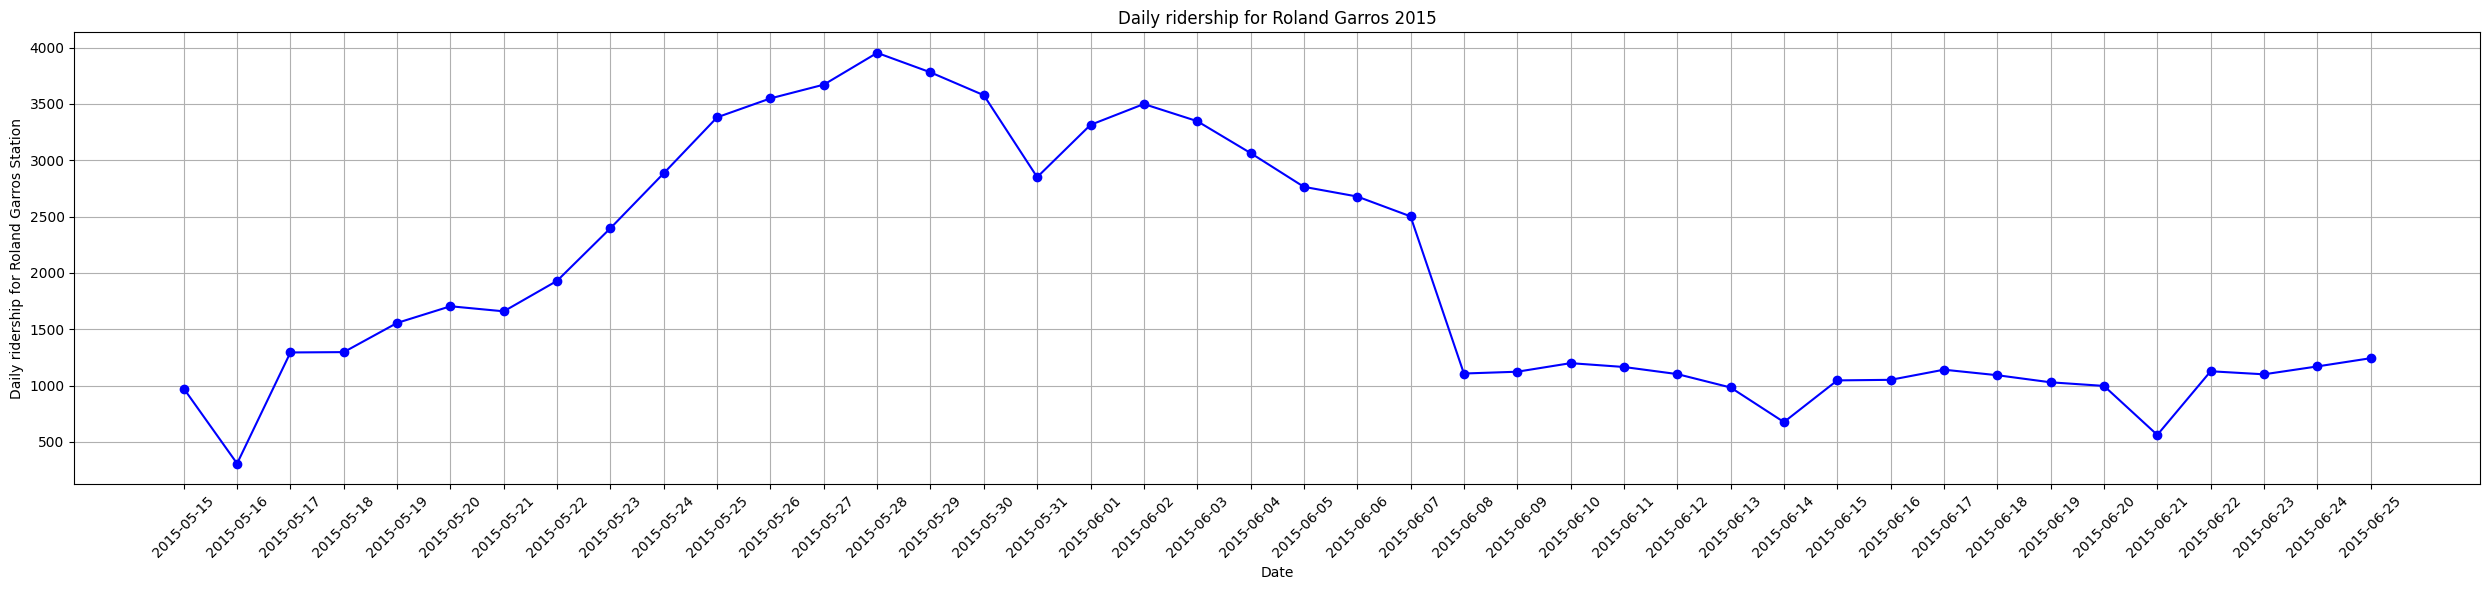

In [7]:
csv_path_2015_s1 = "../data/2015S1_NB_FER.csv"
df_2015_s1 = pd.read_csv(csv_path_2015_s1, sep=';')
df_2015_s1['JOUR'] = pd.to_datetime(df_2015_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2015_s2 = "../data/2015S2_NB_FER.csv"
df_2015_s2 = pd.read_csv(csv_path_2015_s2, sep=';')
df_2015_s2['JOUR'] = pd.to_datetime(df_2015_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2015_raw = pd.concat([df_2015_s1, df_2015_s2])
df_2015_raw = df_2015_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2015_raw["TICKET_TYPE"] = df_2015_raw["TICKET_TYPE"].replace(fares_map)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].replace("Moins de 5", 4)
df_2015_raw["COUNT"] = df_2015_raw["COUNT"].astype(int)
df_2015_raw = df_2015_raw[df_2015_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2015 = df_2015_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2015 = df_2015[["DATE", "STATION", "COUNT"]]
df_2015["DAY_OF_WEEK"] = pd.to_datetime(df_2015["DATE"]).dt.day_of_week
df_2015["DAY_OF_WEEK"] = df_2015["DAY_OF_WEEK"].replace(weekday_map)
print(df_2015.head())
print(len(df_2015))
print("May 24 – Jun 7")
plt.figure(figsize=(25, 6))
plt.plot(df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["DATE"], df_2015[(df_2015["DATE"] >= "2015-05-15") & (df_2015["DATE"] <= "2015-06-25")]["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2015")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


         DATE          STATION  COUNT DAY_OF_WEEK
0  2016-01-01  PORTE D'AUTEUIL    173      Friday
1  2016-01-02  PORTE D'AUTEUIL    544    Saturday
2  2016-01-03  PORTE D'AUTEUIL    554      Sunday
3  2016-01-04  PORTE D'AUTEUIL   1029      Monday
4  2016-01-05  PORTE D'AUTEUIL   1080     Tuesday
364


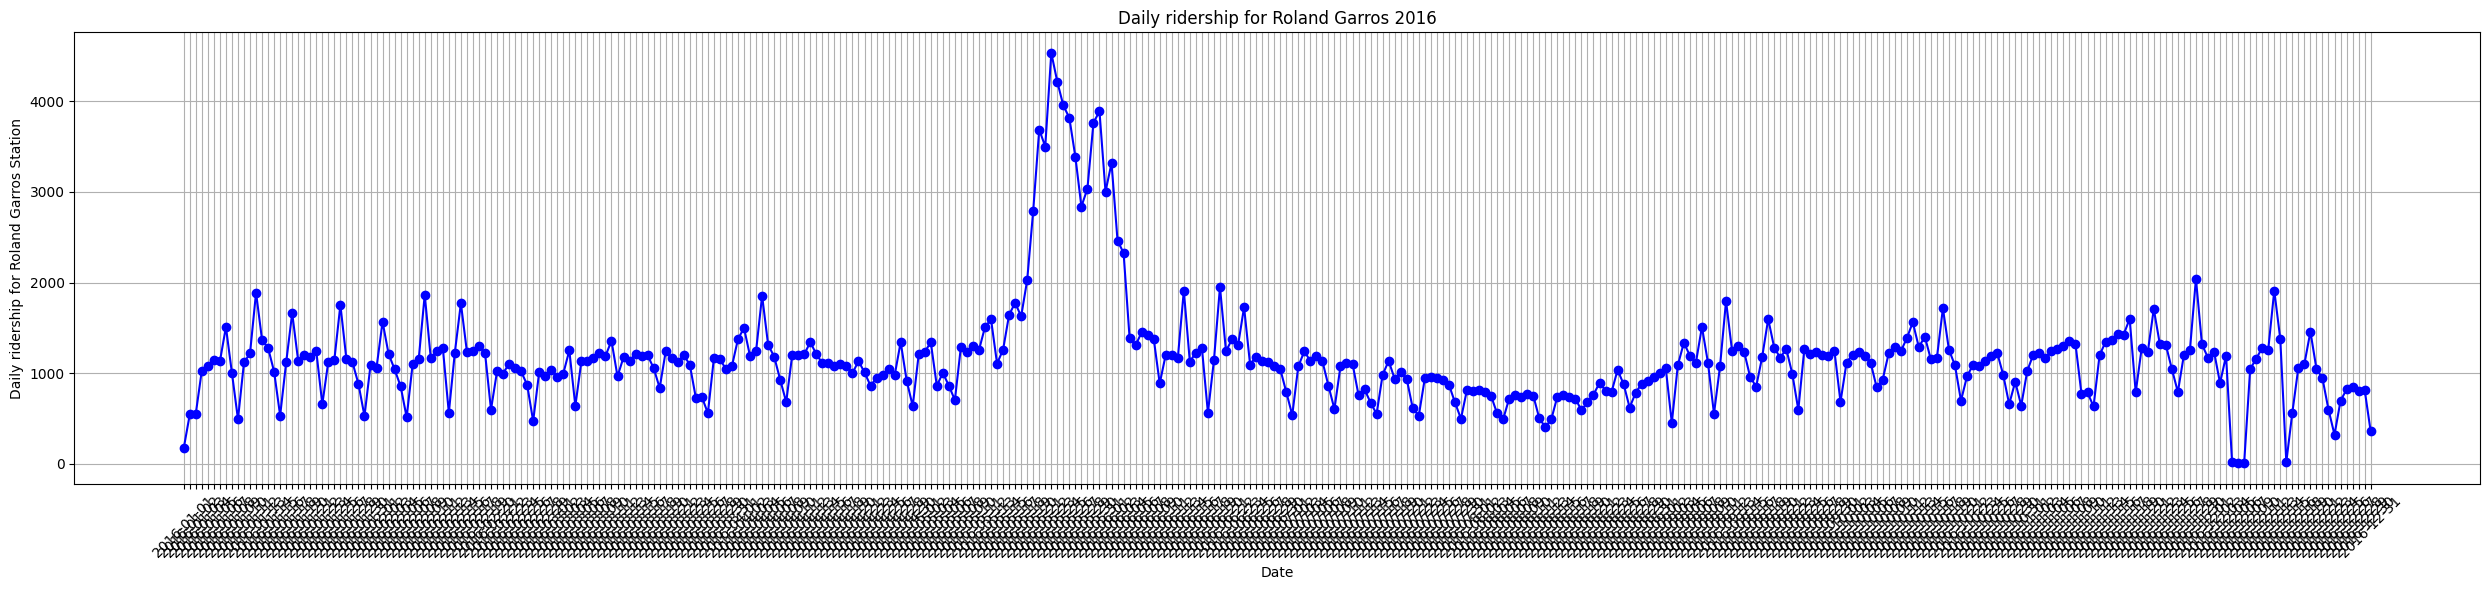

In [8]:
csv_path_2016_s1 = "../data/2016S1_NB_FER.txt"
df_2016_s1 = pd.read_csv(csv_path_2016_s1, delimiter='\t')
df_2016_s1['JOUR'] = pd.to_datetime(df_2016_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2016_s2 = "../data/2016S2_NB_FER.txt"
df_2016_s2 = pd.read_csv(csv_path_2016_s2, delimiter='\t')
df_2016_s2['JOUR'] = pd.to_datetime(df_2016_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2016_raw = pd.concat([df_2016_s1, df_2016_s2])
df_2016_raw = df_2016_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2016_raw["TICKET_TYPE"] = df_2016_raw["TICKET_TYPE"].replace(fares_map)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].replace("Moins de 5", 4)
df_2016_raw["COUNT"] = df_2016_raw["COUNT"].astype(int)
# df_2016_raw[df_2016_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2016_raw = df_2016_raw[df_2016_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2016 = df_2016_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2016 = df_2016[["DATE", "STATION", "COUNT"]]
df_2016["DAY_OF_WEEK"] = pd.to_datetime(df_2016["DATE"]).dt.day_of_week
df_2016["DAY_OF_WEEK"] = df_2016["DAY_OF_WEEK"].replace(weekday_map)
print(df_2016.head())
print(len(df_2016))
plt.figure(figsize=(25, 6))
plt.plot(df_2016["DATE"], df_2016["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2016")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2017-01-01  PORTE D'AUTEUIL    260      Sunday
1  2017-01-02  PORTE D'AUTEUIL    760      Monday
2  2017-01-03  PORTE D'AUTEUIL   1107     Tuesday
3  2017-01-04  PORTE D'AUTEUIL   1173   Wednesday
4  2017-01-05  PORTE D'AUTEUIL   1094    Thursday
365


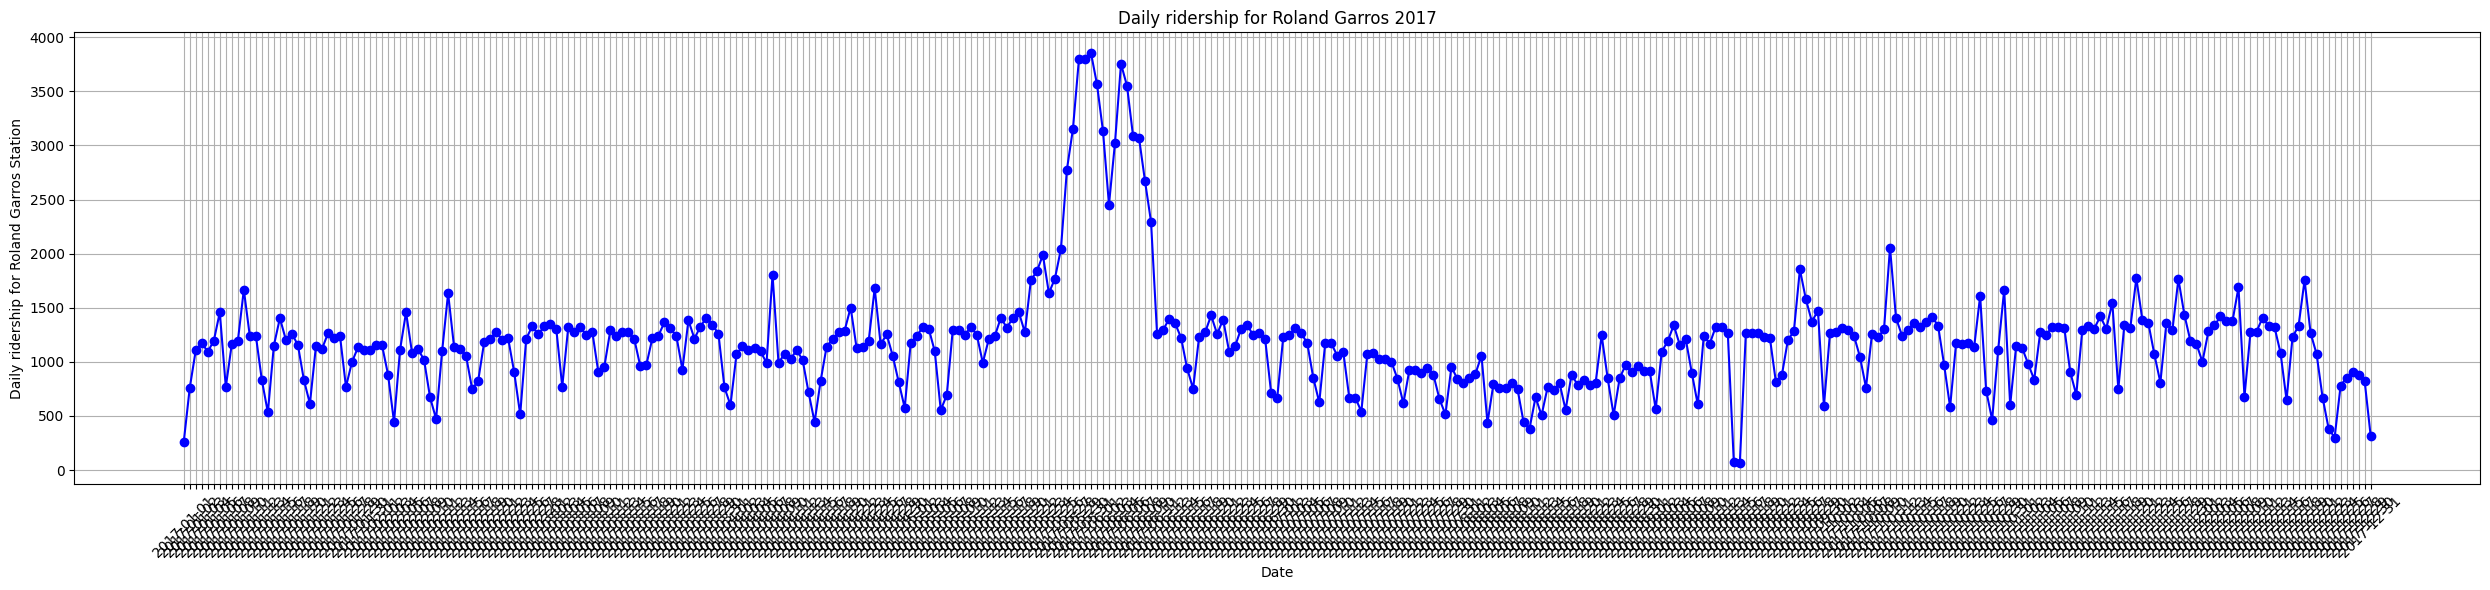

In [9]:
csv_path_2017_s1 = "../data/2017_S1_NB_FER.txt"
df_2017_s1 = pd.read_csv(csv_path_2017_s1, delimiter='\t')
df_2017_s1['JOUR'] = pd.to_datetime(df_2017_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2017_s2 = "../data/2017_S2_NB_FER.txt"
df_2017_s2 = pd.read_csv(csv_path_2017_s2, delimiter='\t')
df_2017_s2['JOUR'] = pd.to_datetime(df_2017_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2017_raw = pd.concat([df_2017_s1, df_2017_s2])
df_2017_raw = df_2017_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2017_raw["TICKET_TYPE"] = df_2017_raw["TICKET_TYPE"].replace(fares_map)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].replace("Moins de 5", 4)
df_2017_raw["COUNT"] = df_2017_raw["COUNT"].astype(int)
# df_2017_raw[df_2017_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2017_raw = df_2017_raw[df_2017_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2017 = df_2017_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2017 = df_2017[["DATE", "STATION", "COUNT"]]
df_2017["DAY_OF_WEEK"] = pd.to_datetime(df_2017["DATE"]).dt.day_of_week
df_2017["DAY_OF_WEEK"] = df_2017["DAY_OF_WEEK"].replace(weekday_map)
print(df_2017.head())
print(len(df_2017))
plt.figure(figsize=(25, 6))
plt.plot(df_2017["DATE"], df_2017["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2017")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2018-01-01  PORTE D'AUTEUIL    221      Monday
1  2018-01-02  PORTE D'AUTEUIL    802     Tuesday
2  2018-01-03  PORTE D'AUTEUIL    900   Wednesday
3  2018-01-04  PORTE D'AUTEUIL    992    Thursday
4  2018-01-05  PORTE D'AUTEUIL    971      Friday
365


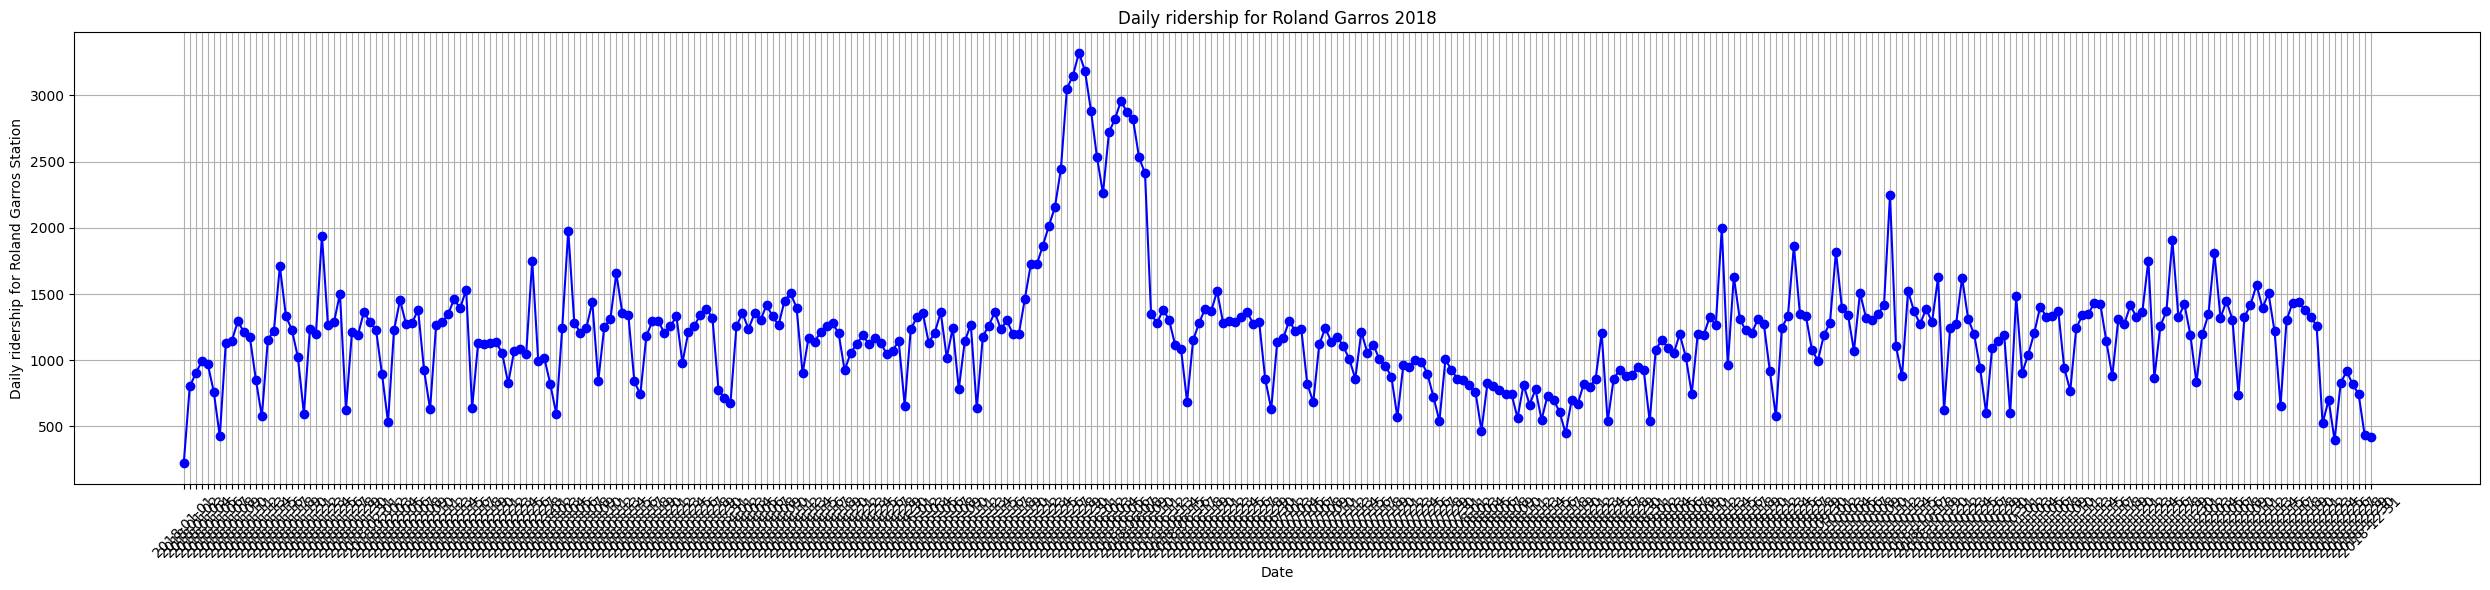

In [10]:
csv_path_2018_s1 = "../data/2018_S1_NB_FER.txt"
df_2018_s1 = pd.read_csv(csv_path_2018_s1, delimiter='\t')
df_2018_s1['JOUR'] = pd.to_datetime(df_2018_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2018_s2 = "../data/2018_S2_NB_FER.txt"
df_2018_s2 = pd.read_csv(csv_path_2018_s2, delimiter='\t')
df_2018_s2['JOUR'] = pd.to_datetime(df_2018_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2018_raw = pd.concat([df_2018_s1, df_2018_s2])
df_2018_raw = df_2018_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2018_raw["TICKET_TYPE"] = df_2018_raw["TICKET_TYPE"].replace(fares_map)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].replace("Moins de 5", 4)
df_2018_raw["COUNT"] = df_2018_raw["COUNT"].astype(int)
# df_2018_raw[df_2018_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2018_raw = df_2018_raw[df_2018_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2018 = df_2018_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2018 = df_2018[["DATE", "STATION", "COUNT"]]
df_2018["DAY_OF_WEEK"] = pd.to_datetime(df_2018["DATE"]).dt.day_of_week
df_2018["DAY_OF_WEEK"] = df_2018["DAY_OF_WEEK"].replace(weekday_map)
print(df_2018.head())
print(len(df_2018))
plt.figure(figsize=(25, 6))
plt.plot(df_2018["DATE"], df_2018["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2018")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2019-01-01  PORTE D'AUTEUIL    293     Tuesday
1  2019-01-02  PORTE D'AUTEUIL    868   Wednesday
2  2019-01-03  PORTE D'AUTEUIL    973    Thursday
3  2019-01-04  PORTE D'AUTEUIL   1002      Friday
4  2019-01-05  PORTE D'AUTEUIL    894    Saturday
362


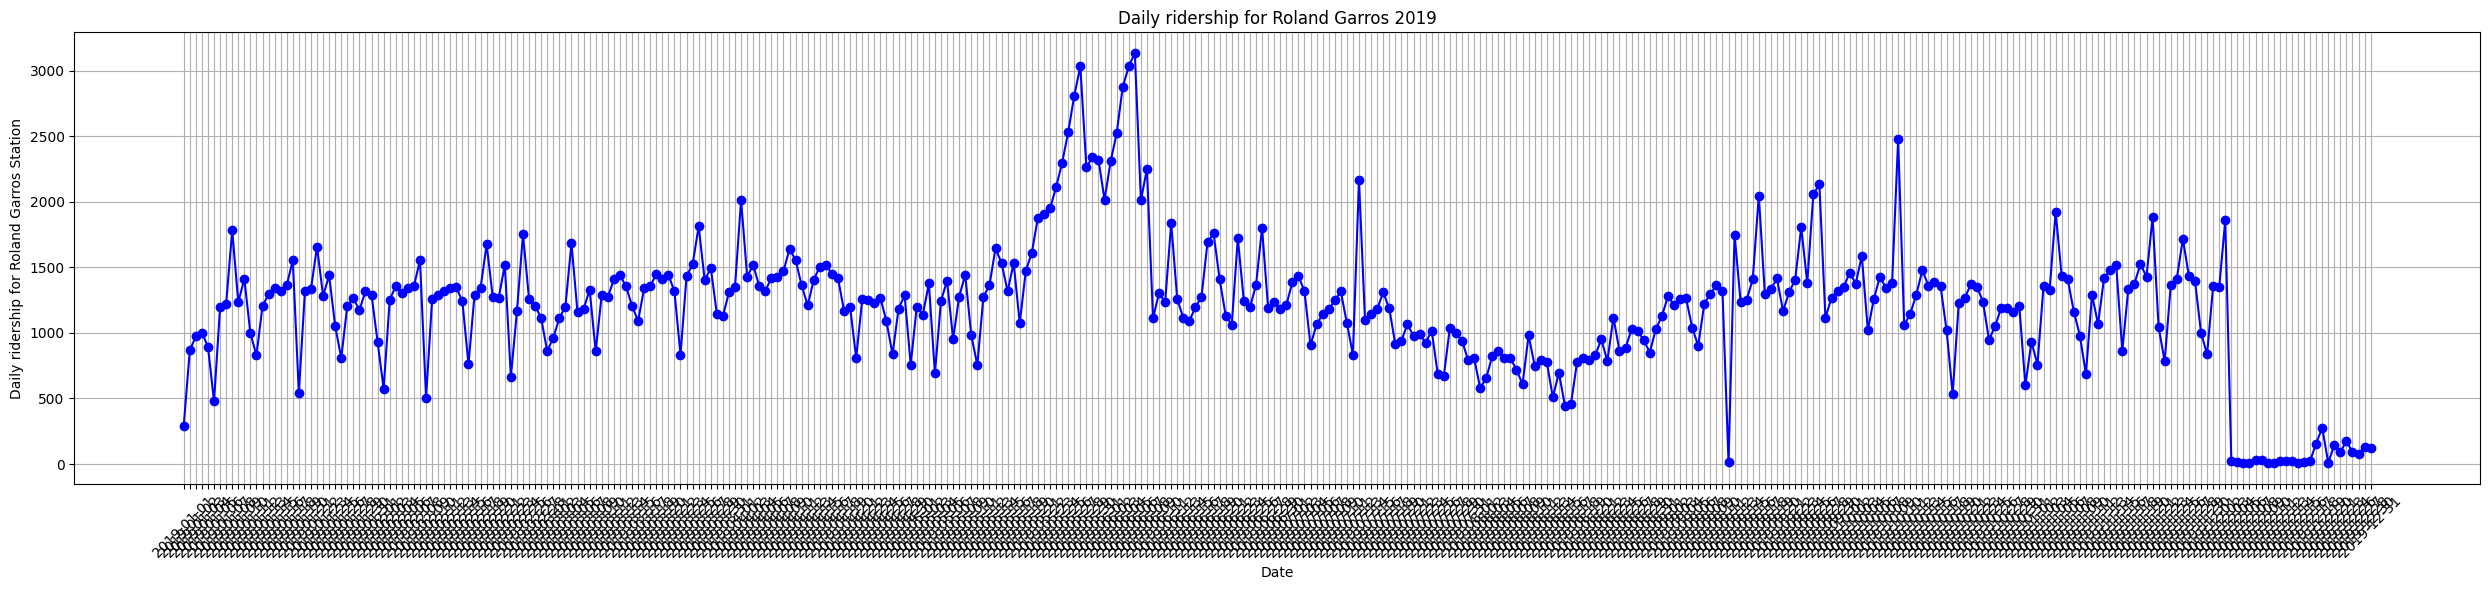

In [11]:
csv_path_2019_s1 = "../data/2019_S1_NB_FER.txt"
df_2019_s1 = pd.read_csv(csv_path_2019_s1, delimiter='\t')
df_2019_s1['JOUR'] = pd.to_datetime(df_2019_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2019_s2 = "../data/2019_S2_NB_FER.txt"
df_2019_s2 = pd.read_csv(csv_path_2019_s2, delimiter='\t')
df_2019_s2['JOUR'] = pd.to_datetime(df_2019_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2019_raw = pd.concat([df_2019_s1, df_2019_s2])
df_2019_raw = df_2019_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2019_raw["TICKET_TYPE"] = df_2019_raw["TICKET_TYPE"].replace(fares_map)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].replace("Moins de 5", 4)
df_2019_raw["COUNT"] = df_2019_raw["COUNT"].astype(int)
# df_2019_raw[df_2019_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2019_raw = df_2019_raw[df_2019_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2019 = df_2019_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2019 = df_2019[["DATE", "STATION", "COUNT"]]
df_2019["DAY_OF_WEEK"] = pd.to_datetime(df_2019["DATE"]).dt.day_of_week
df_2019["DAY_OF_WEEK"] = df_2019["DAY_OF_WEEK"].replace(weekday_map)
print(df_2019.head())
print(len(df_2019))
plt.figure(figsize=(25, 6))
plt.plot(df_2019["DATE"], df_2019["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2019")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2020-01-02  PORTE D'AUTEUIL    132    Thursday
1  2020-01-03  PORTE D'AUTEUIL    208      Friday
2  2020-01-04  PORTE D'AUTEUIL    196    Saturday
3  2020-01-05  PORTE D'AUTEUIL    136      Sunday
4  2020-01-06  PORTE D'AUTEUIL    428      Monday
365


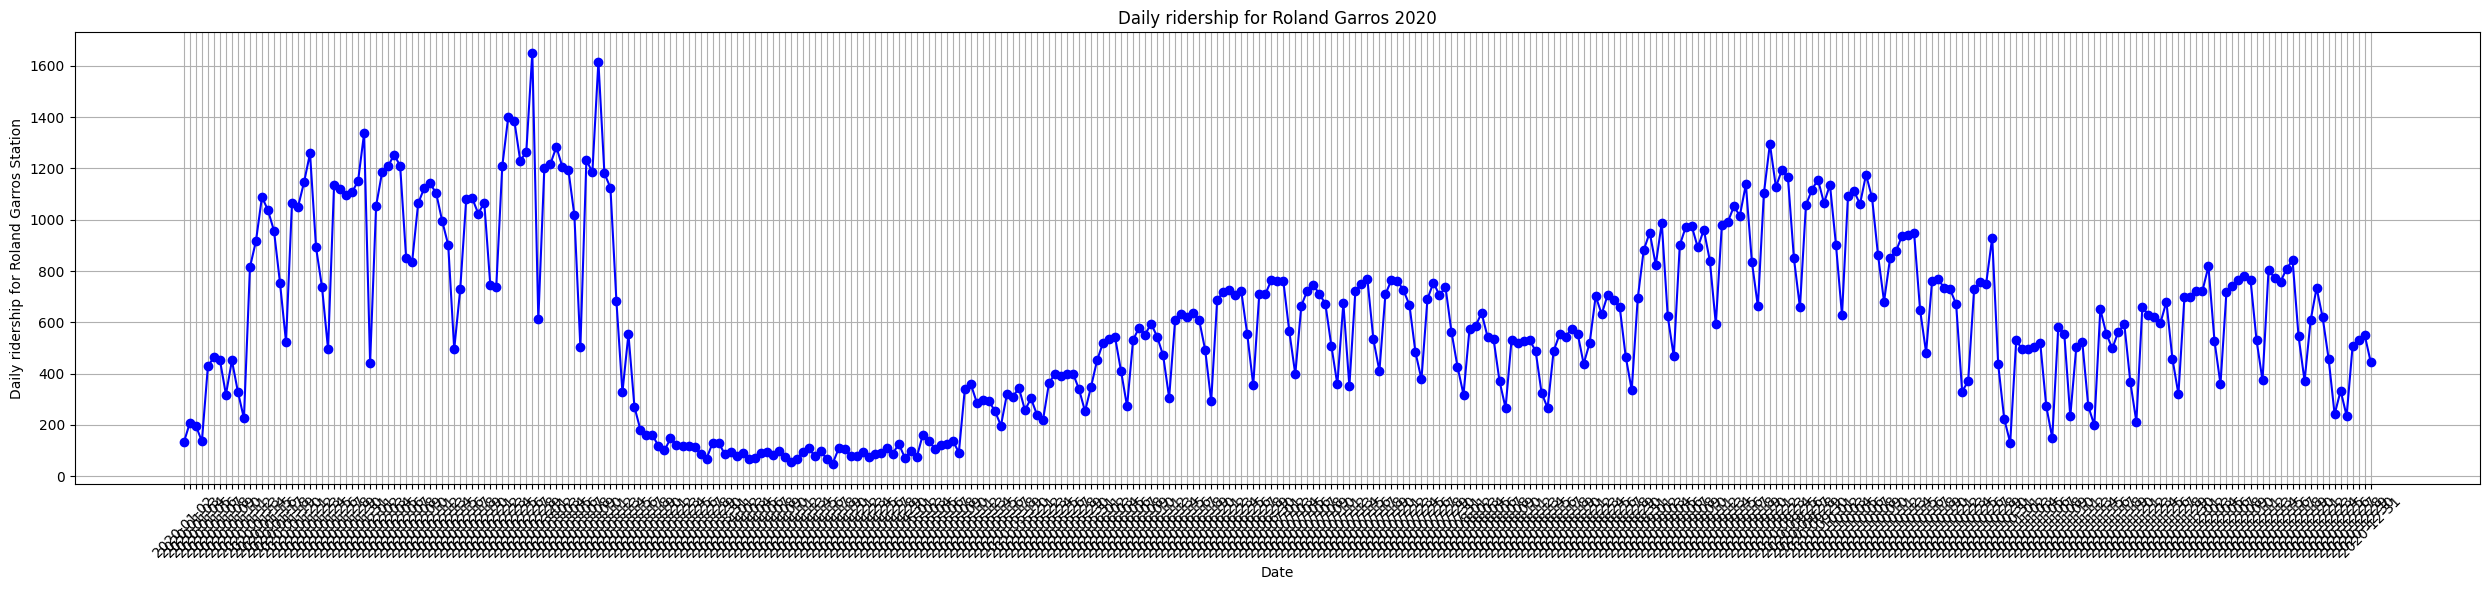

In [12]:
csv_path_2020_s1 = "../data/2020_S1_NB_FER.txt"
df_2020_s1 = pd.read_csv(csv_path_2020_s1, delimiter='\t')
df_2020_s1['JOUR'] = pd.to_datetime(df_2020_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2020_s2 = "../data/2020_S2_NB_FER.txt"
df_2020_s2 = pd.read_csv(csv_path_2020_s2, delimiter='\t')
df_2020_s2['JOUR'] = pd.to_datetime(df_2020_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2020_raw = pd.concat([df_2020_s1, df_2020_s2])
df_2020_raw = df_2020_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2020_raw["TICKET_TYPE"] = df_2020_raw["TICKET_TYPE"].replace(fares_map)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].replace("Moins de 5", 4)
df_2020_raw["COUNT"] = df_2020_raw["COUNT"].astype(int)
# df_2020_raw[df_2020_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2020_raw = df_2020_raw[df_2020_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2020 = df_2020_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2020 = df_2020[["DATE", "STATION", "COUNT"]]
df_2020["DAY_OF_WEEK"] = pd.to_datetime(df_2020["DATE"]).dt.day_of_week
df_2020["DAY_OF_WEEK"] = df_2020["DAY_OF_WEEK"].replace(weekday_map)
print(df_2020.head())
print(len(df_2020))
plt.figure(figsize=(25, 6))
plt.plot(df_2020["DATE"], df_2020["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2020")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2021-01-01  PORTE D'AUTEUIL    213      Friday
1  2021-01-02  PORTE D'AUTEUIL    387    Saturday
2  2021-01-03  PORTE D'AUTEUIL    312      Sunday
3  2021-01-04  PORTE D'AUTEUIL    698      Monday
4  2021-01-05  PORTE D'AUTEUIL    714     Tuesday
365


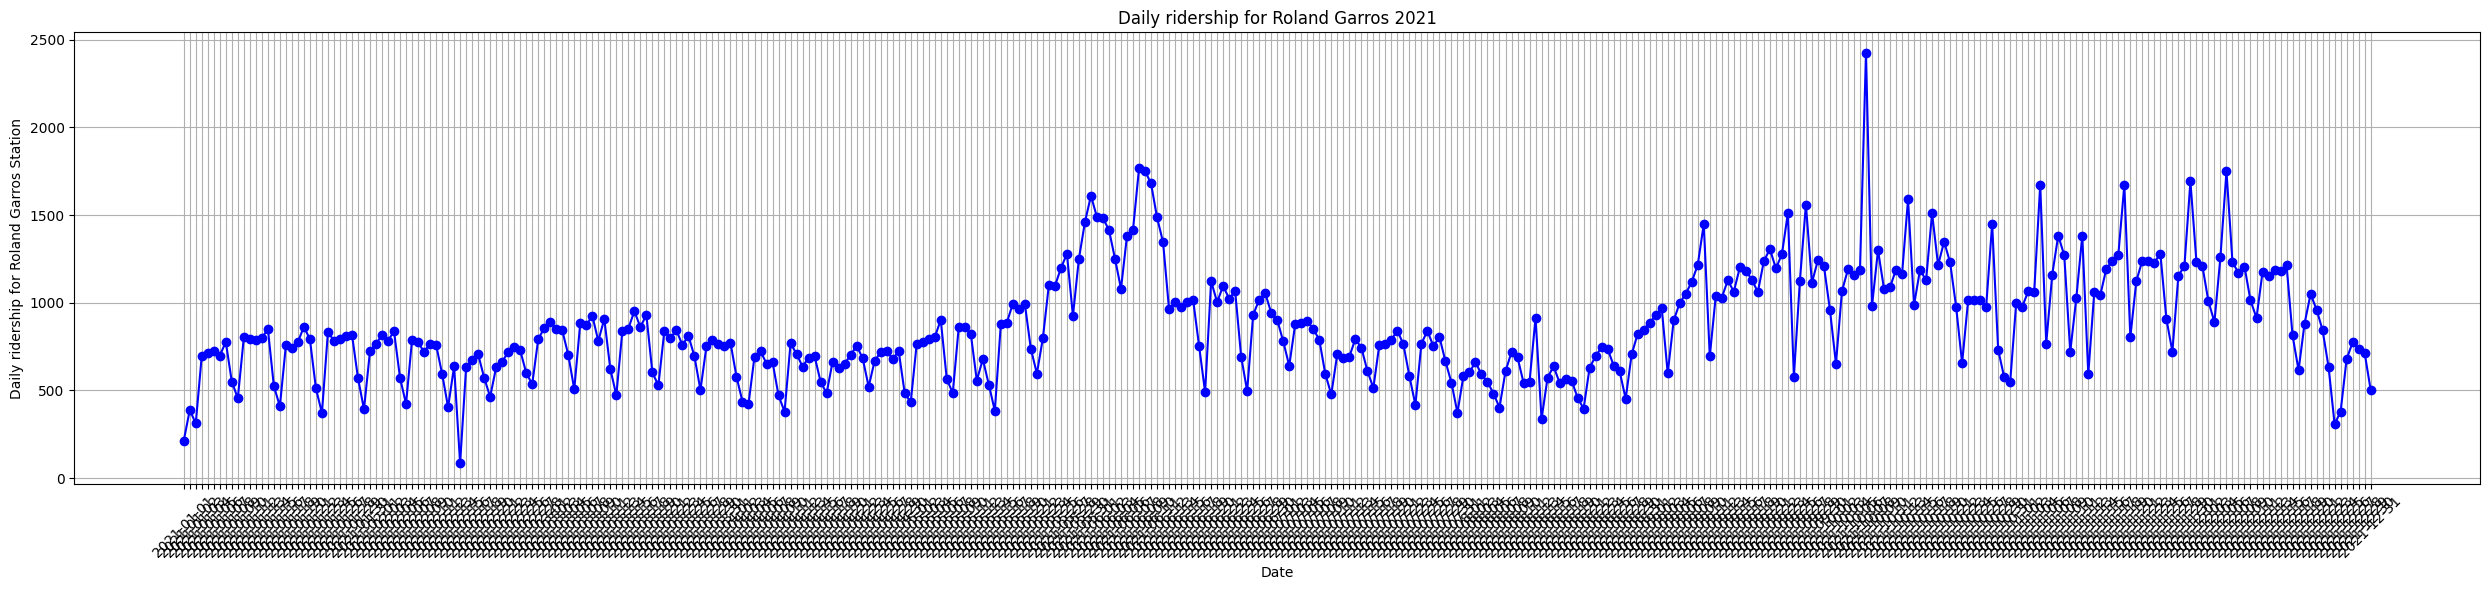

In [13]:
csv_path_2021_s1 = "../data/2021_S1_NB_FER.txt"
df_2021_s1 = pd.read_csv(csv_path_2021_s1, delimiter='\t')
df_2021_s1['JOUR'] = pd.to_datetime(df_2021_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2021_s2 = "../data/2021_S2_NB_FER.txt"
df_2021_s2 = pd.read_csv(csv_path_2021_s2, delimiter='\t')
df_2021_s2['JOUR'] = pd.to_datetime(df_2021_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2021_raw = pd.concat([df_2021_s1, df_2021_s2])
df_2021_raw = df_2021_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2021_raw["TICKET_TYPE"] = df_2021_raw["TICKET_TYPE"].replace(fares_map)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].replace("Moins de 5", 4)
df_2021_raw["COUNT"] = df_2021_raw["COUNT"].astype(int)
# df_2021_raw[df_2021_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2021_raw = df_2021_raw[df_2021_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2021 = df_2021_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2021 = df_2021[["DATE", "STATION", "COUNT"]]
df_2021["DAY_OF_WEEK"] = pd.to_datetime(df_2021["DATE"]).dt.day_of_week
df_2021["DAY_OF_WEEK"] = df_2021["DAY_OF_WEEK"].replace(weekday_map)
print(df_2021.head())
print(len(df_2021))
plt.figure(figsize=(25, 6))
plt.plot(df_2021["DATE"], df_2021["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2021")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

         DATE          STATION  COUNT DAY_OF_WEEK
0  2022-01-01  PORTE D'AUTEUIL    351    Saturday
1  2022-01-02  PORTE D'AUTEUIL    441      Sunday
2  2022-01-03  PORTE D'AUTEUIL    984      Monday
3  2022-01-04  PORTE D'AUTEUIL    971     Tuesday
4  2022-01-05  PORTE D'AUTEUIL    958   Wednesday
362


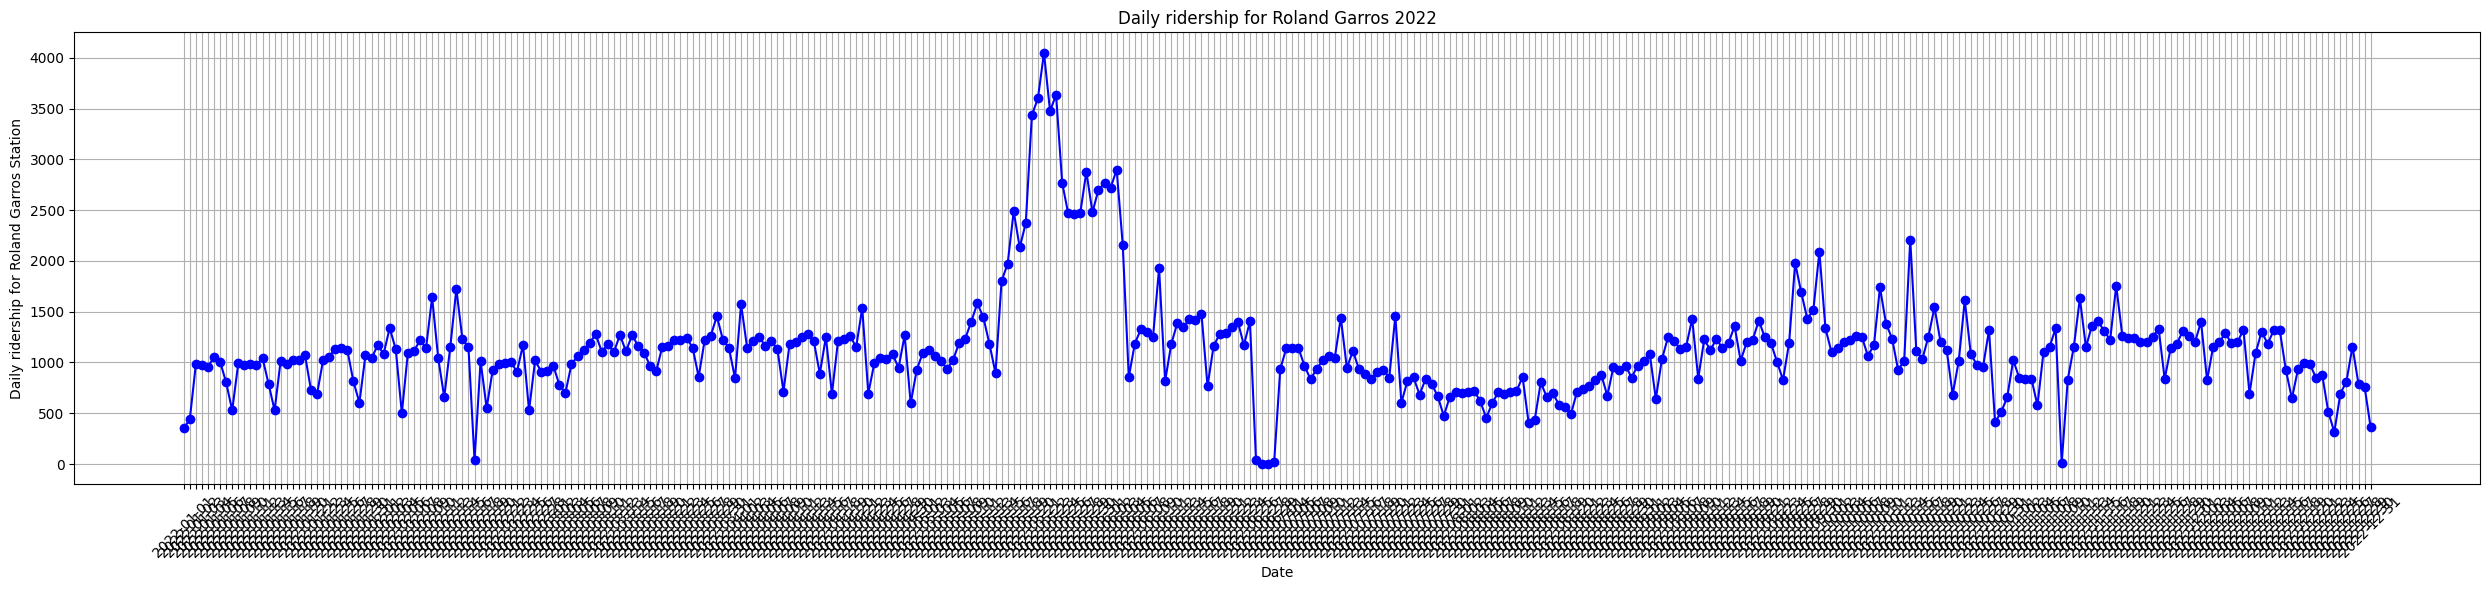

In [14]:
csv_path_2022_s1 = '../data/2022_S1_NB_FER.txt'
df_2022_s1 = pd.read_csv(csv_path_2022_s1, delimiter='\t')
df_2022_s1['JOUR'] = pd.to_datetime(df_2022_s1['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

csv_path_2022_s2 = '../data/2022_S2_NB_FER.txt'
df_2022_s2 = pd.read_csv(csv_path_2022_s2, delimiter=';')
df_2022_s2['JOUR'] = pd.to_datetime(df_2022_s2['JOUR'], format="%d/%m/%Y").dt.strftime('%Y-%m-%d')

df_2022_raw = pd.concat([df_2022_s1, df_2022_s2])
df_2022_raw = df_2022_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2022_raw["TICKET_TYPE"] = df_2022_raw["TICKET_TYPE"].replace(fares_map)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].replace("Moins de 5", 4)
df_2022_raw["COUNT"] = df_2022_raw["COUNT"].astype(int)
# df_2022_raw[df_2022_raw["STATION"].str.contains("D'AUTEUIL")]["STATION"].unique()
df_2022_raw["STATION"] = df_2022_raw["STATION"].replace("PTE D'AUTEUIL ", "PORTE D'AUTEUIL")
df_2022_raw = df_2022_raw[df_2022_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2022 = df_2022_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2022 = df_2022[["DATE", "STATION", "COUNT"]]
df_2022["DAY_OF_WEEK"] = pd.to_datetime(df_2022["DATE"]).dt.day_of_week
df_2022["DAY_OF_WEEK"] = df_2022["DAY_OF_WEEK"].replace(weekday_map)
print(df_2022.head())
print(len(df_2022))
plt.figure(figsize=(25, 6))
plt.plot(df_2022["DATE"], df_2022["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2022")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

        DATE          STATION  COUNT DAY_OF_WEEK
0 2023-01-01  PORTE D'AUTEUIL    268      Sunday
1 2023-01-02  PORTE D'AUTEUIL    815      Monday
2 2023-01-03  PORTE D'AUTEUIL    920     Tuesday
3 2023-01-04  PORTE D'AUTEUIL   1087   Wednesday
4 2023-01-05  PORTE D'AUTEUIL   1057    Thursday
181


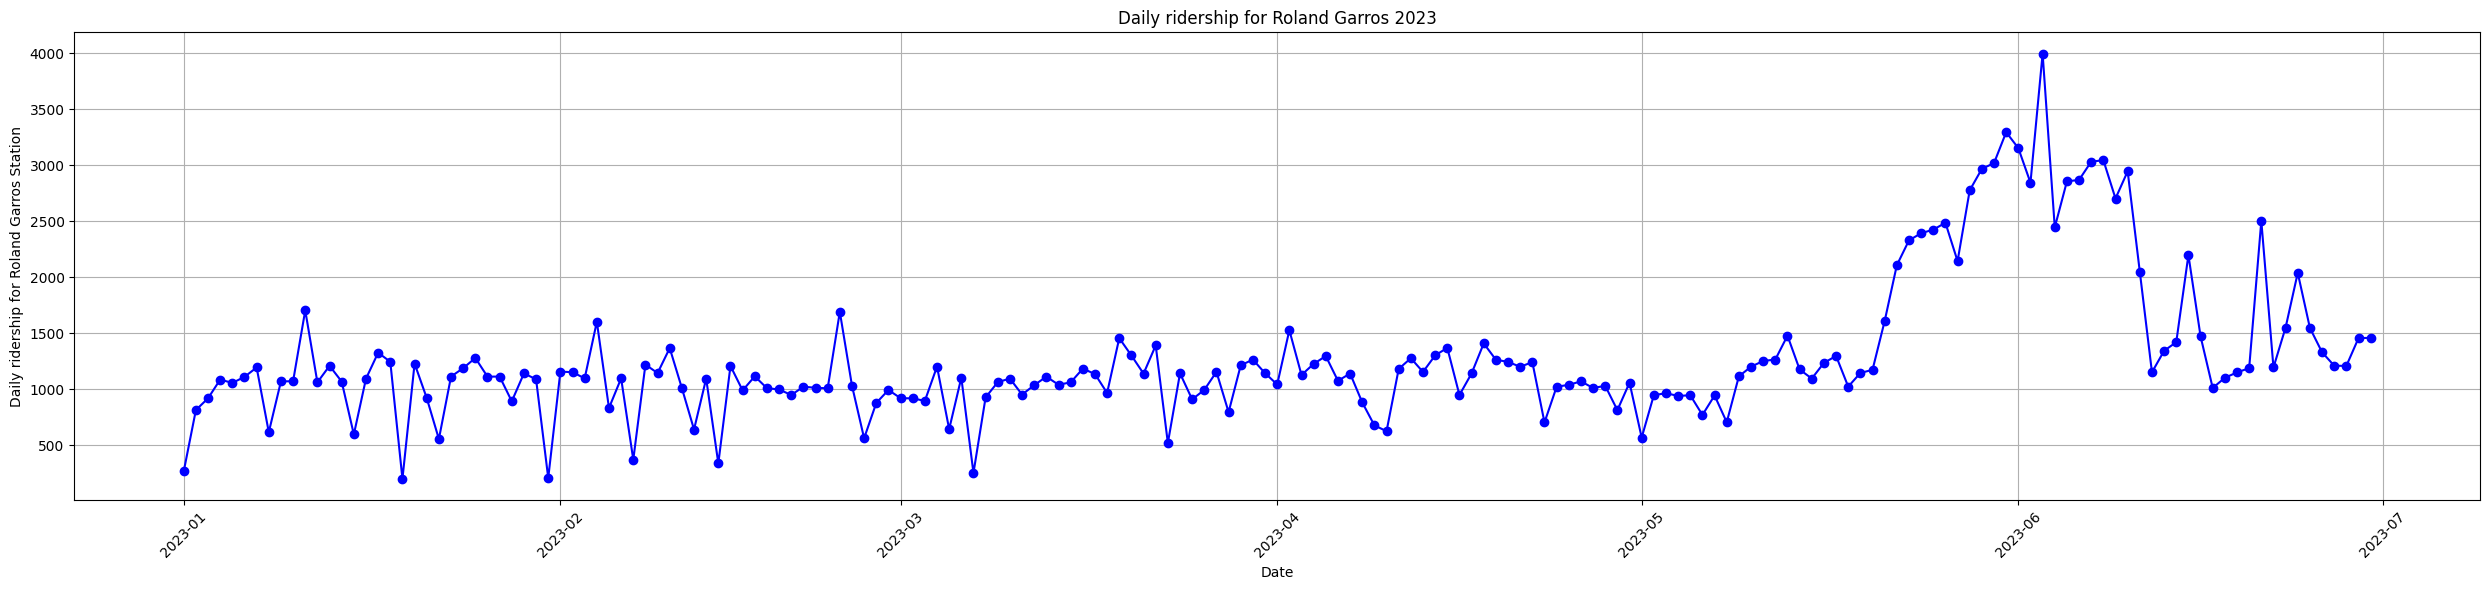

In [15]:
csv_path_2023_s1 = '../data/validations-reseau-ferre-nombre-validations-par-jour-1er-semestre.csv'
df_2023_s1 = pd.read_csv(csv_path_2023_s1, delimiter=';')
df_2023_s1['JOUR'] = pd.to_datetime(df_2023_s1['JOUR'])

df_2023_raw = pd.concat([df_2023_s1])
df_2023_raw = df_2023_raw[["JOUR", "LIBELLE_ARRET", "CATEGORIE_TITRE", "NB_VALD"]].rename(columns=column_map)
df_2023_raw["TICKET_TYPE"] = df_2023_raw["TICKET_TYPE"].replace(fares_map)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].replace("Moins de 5", 4)
df_2023_raw["COUNT"] = df_2023_raw["COUNT"].astype(int)
df_2023_raw["STATION"] = df_2023_raw["STATION"].replace("PTE D'AUTEUIL", "PORTE D'AUTEUIL")
df_2023_raw = df_2023_raw[df_2023_raw["STATION"] == "PORTE D'AUTEUIL"]
 
df_2023 = df_2023_raw.groupby(["DATE", "STATION"]).sum().reset_index()
df_2023 = df_2023[["DATE", "STATION", "COUNT"]]
df_2023["DAY_OF_WEEK"] = pd.to_datetime(df_2023["DATE"]).dt.day_of_week
df_2023["DAY_OF_WEEK"] = df_2023["DAY_OF_WEEK"].replace(weekday_map)
print(df_2023.head())
print(len(df_2023))
plt.figure(figsize=(25, 6))
plt.plot(df_2023["DATE"], df_2023["COUNT"], marker='o', linestyle='-', color='b')
plt.xlabel("Date")
plt.ylabel("Daily ridership for Roland Garros Station")
plt.title("Daily ridership for Roland Garros 2023")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Build Model
Reference: [https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/3-SVR/README.md](Reference:https://github.com/microsoft/ML-For-Beginners/blob/main/7-TimeSeries/3-SVR/README.md)

1. 2015 French Open: May 24 – Jun 7
2. 2016 French Open: May 22 – Jun 5
3. 2017 French Open: May 28 – Jun 11
4. 2018 French Open: May 27 – Jun 10
5. 2019 French Open: May 26 – Jun 9
6. 2020 French Open: Sep 24 – Oct 7 (COVID no attendance, should be remove)
7. 2021 French Open: May 30 – Jun 13 (the data seems to be affected by COVID too)
8. 2022 French Open: May 22 – Jun 5
3. 2023 French Open: May 28 – Jun 11

### Create Train and Test Data

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np

In [17]:
def mean_absolute_percentage_error(pred, gt):
    pred = np.array(pred).flatten()
    gt = np.array(gt).flatten()
    return (np.absolute(pred - gt) / gt).mean()

In [18]:
# index = df_2016[df_2016["DATE"] == "2016-02-29"].index
# df_2016 = df_2016.drop(index)

# index = df_2020[df_2020["DATE"] == "2020-02-29"].index
# df_2020 = df_2020.drop(index)

# since 2015 March is missing two days 3/21 and 3/22, we need to put some value in it.
if not (df_2015[df_2015["DATE"] == "2015-03-21"].values.any() and df_2015[df_2015["DATE"] == "2015-03-22"].values.any()):
    new_data = {
        "DATE": ["2015-03-21", "2015-03-22"],
        "STATION": ["PORTE D'AUTEUIL", "PORTE D'AUTEUIL"],
        "COUNT": [df_2015[df_2015["DATE"] == "2015-03-14"]["COUNT"].values[0], df_2015[df_2015["DATE"] == "2015-03-15"]["COUNT"].values[0]]
    }
    new_df = pd.DataFrame(new_data)
    df_2015 = pd.concat([df_2015, new_df], ignore_index=True)
    df_2015.sort_values(by=['DATE'], inplace=True)

french_open_data = {
    2015: df_2015,
    2016: df_2016,
    2017: df_2017,
    2018: df_2018,
    2019: df_2019,
    # 2021: df_2021,
    2022: df_2022,
    2023: df_2023
}

### Predict French Open 2024 with just french open data

In [42]:
fo_scaler = MinMaxScaler()

# lets include fans day, starting 7 days before the match begins
start_dates = ["2015-05-17", "2016-05-15", "2017-05-21", "2018-05-20", "2019-05-19", "2022-05-15", "2023-05-22"]
end_dates = ["2015-06-07", "2016-06-05", "2017-06-11", "2018-06-10", "2019-06-09", "2022-06-05", "2023-06-12"] # for 2023, to make the length same I use 12th for end date
counts = pd.concat([
    df_2015[(df_2015["DATE"] >= start_dates[0]) & (df_2015["DATE"] <= end_dates[0])]["COUNT"], 
    df_2016[(df_2016["DATE"] >= start_dates[1]) & (df_2016["DATE"] <= end_dates[1])]["COUNT"], 
    df_2017[(df_2017["DATE"] >= start_dates[2]) & (df_2017["DATE"] <= end_dates[2])]["COUNT"], 
    df_2018[(df_2018["DATE"] >= start_dates[3]) & (df_2018["DATE"] <= end_dates[3])]["COUNT"], 
    df_2019[(df_2019["DATE"] >= start_dates[4]) & (df_2019["DATE"] <= end_dates[4])]["COUNT"], 
    df_2022[(df_2022["DATE"] >= start_dates[5]) & (df_2022["DATE"] <= end_dates[5])]["COUNT"], 
    df_2023[(df_2023["DATE"] >= start_dates[6]) & (df_2023["DATE"] <= end_dates[6])]["COUNT"]]).values
fo_scaler.fit(counts.reshape(-1, 1))

MinMaxScaler()

In [43]:
for key, df in french_open_data.items():
    df["COUNT_SCALE"] = fo_scaler.transform(df["COUNT"].values.reshape(-1, 1))

# ensure no data lost
for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates[idx]) & (data["DATE"] <= end_dates[idx])])))

2015: 22 days
2016: 22 days
2017: 22 days
2018: 22 days
2019: 22 days
2022: 22 days
2023: 22 days


In [95]:
french_open_days = 22

years = list(french_open_data.keys())
fo_dataset = [] # fo - French Open
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates[idx - 2]) & (first["DATE"] <= end_dates[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates[idx - 1]) & (second["DATE"] <= end_dates[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates[idx]) & (third["DATE"] <= end_dates[idx])]

    for i in range(french_open_days):
        first_day = first.iloc[i]["COUNT_SCALE"]
        second_day = second.iloc[i]["COUNT_SCALE"]
        third_day = third.iloc[i]["COUNT_SCALE"]
        fo_dataset.append([first_day, second_day, third_day])

fo_dataset = np.array(fo_dataset)
fo_dataset.shape

(110, 3)

In [61]:
fo_dataset_x, fo_dataset_y = fo_dataset[:, :-1], fo_dataset[:, [-1]]
print("dataset shape: ", fo_dataset_x.shape, fo_dataset_y.shape)
train_x, validate_x, train_y, validate_y = train_test_split(fo_dataset_x, fo_dataset_y, test_size=0.1, shuffle=True)
print("after split:", train_x.shape, train_y.shape, validate_x.shape, validate_y.shape)

dataset shape:  (110, 2) (110, 1)
after split: (99, 2) (99, 1) (11, 2) (11, 1)


In [62]:
# build model
fo_model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
fo_model.fit(train_x, train_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

train mape:  0.12498807490559458


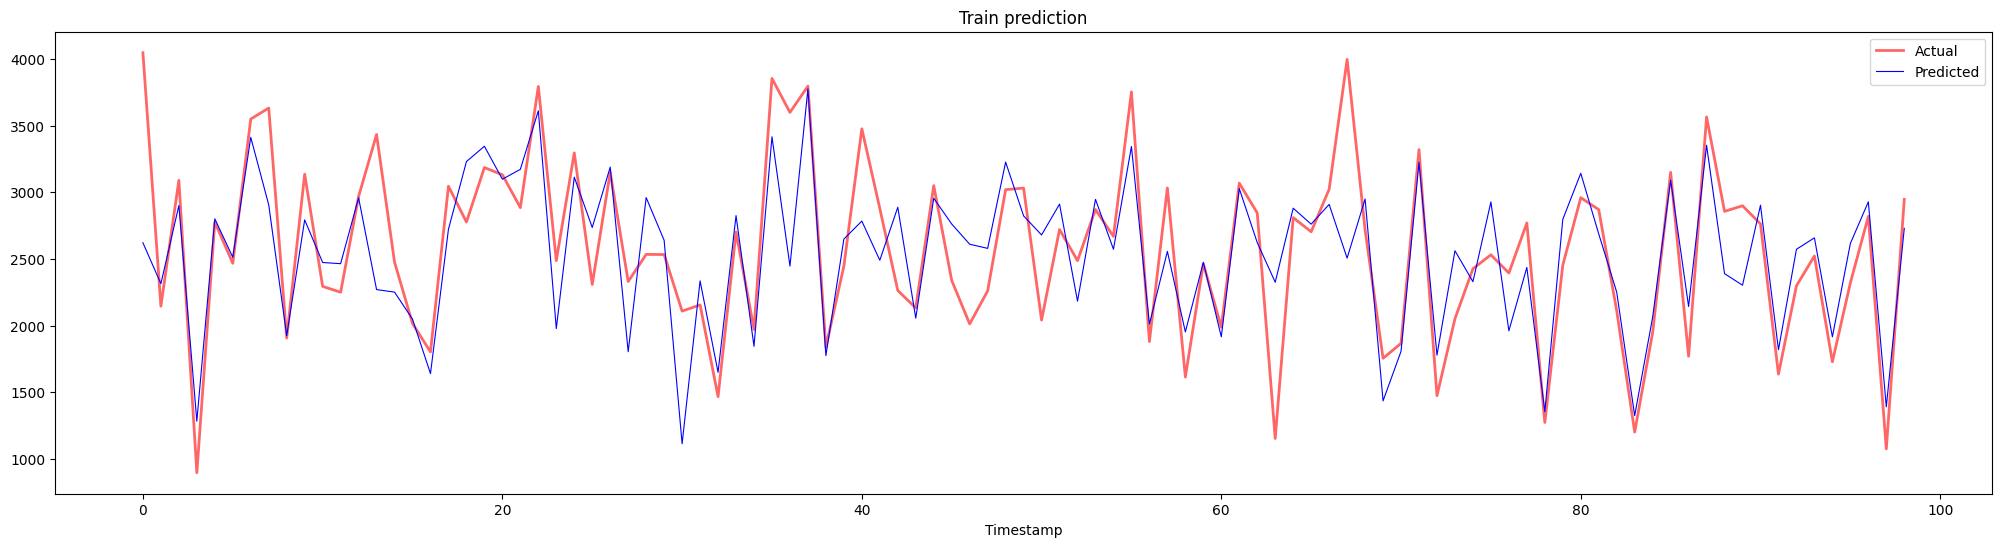

In [63]:
# evaluate train data
train_pred = fo_model.predict(train_x).reshape(-1,1)
y_train_pred = fo_scaler.inverse_transform(train_pred)
y_train = fo_scaler.inverse_transform(train_y)
print("train mape: ", mean_absolute_percentage_error(y_train_pred, y_train))

plt.figure(figsize=(25,6))
plt.plot(range(len(train_x)), y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_x)), y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Train prediction")
plt.show()

validate mape:  0.08369069600843919


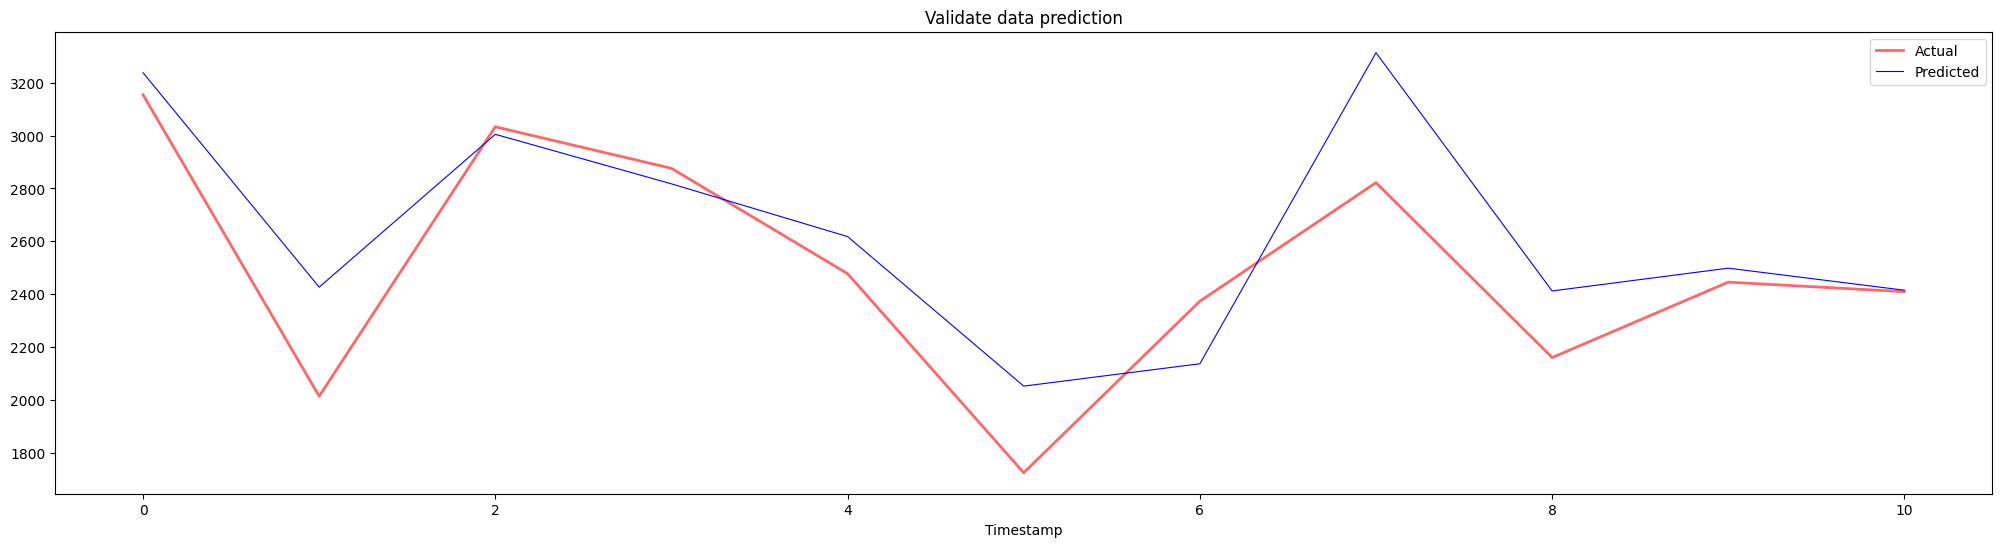

In [64]:
# evaluate validate data
validate_pred = fo_model.predict(validate_x).reshape(-1,1)
y_validate_pred = fo_scaler.inverse_transform(validate_pred)
y_validate = fo_scaler.inverse_transform(validate_y)
print("validate mape: ", mean_absolute_percentage_error(y_validate_pred, y_validate))

plt.figure(figsize=(25,6))
plt.plot(range(len(validate_x)), y_validate, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(validate_x)), y_validate_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Validate data prediction")
plt.show()

In [65]:
test_data = []
first = french_open_data[2022]
first = first[(first["DATE"] >= "2022-05-15") & (first["DATE"] <= "2022-06-05")]

second = french_open_data[2023]
second = second[(second["DATE"] >= "2023-05-22") & (second["DATE"] <= "2023-06-12")]

for i in range(french_open_days):
    first_day = first.iloc[i]["COUNT_SCALE"]
    second_day = second.iloc[i]["COUNT_SCALE"]
    test_data.append([first_day, second_day])

test_data = np.array(test_data)
test_data.shape

(22, 2)

[1525.05957221 2222.08426848 2332.68425594 2522.15903455 2444.09607812
 2348.55145277 2721.4313645  2810.88879456 2685.32573949 3053.75102129
 2929.91729686 2791.20812055 3176.88395633 2527.58798587 2734.0513395
 2816.75818494 2815.55037868 2882.16501521 2714.70607577 2835.96856256
 2337.83246541 1734.38394341]


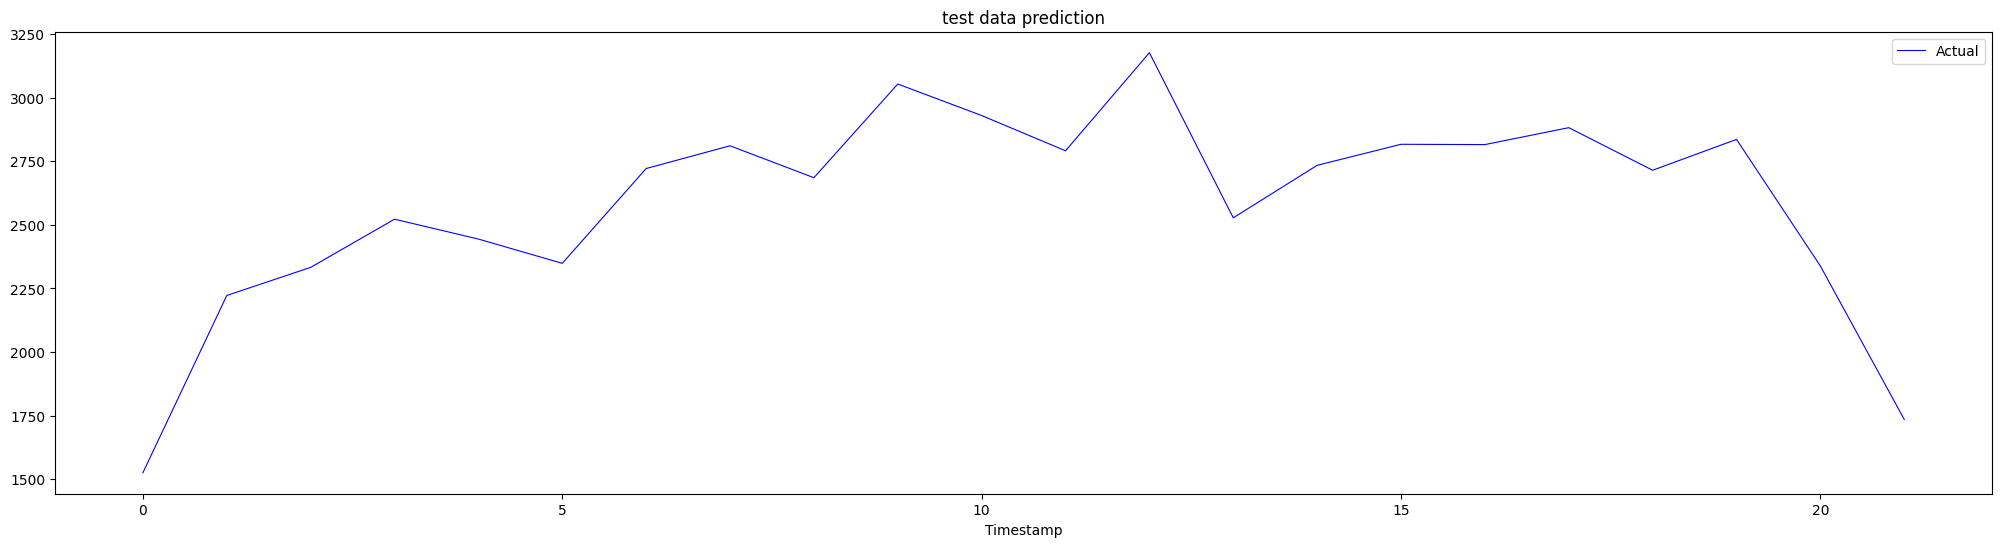

In [66]:
test_pred = fo_model.predict(test_data).reshape(-1,1)
y_test_pred = fo_scaler.inverse_transform(test_pred)
print(y_test_pred.reshape(-1))
plt.figure(figsize=(25,6))
plt.plot(range(len(test_data)), y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("test data prediction")
plt.show()

[French Open 2023 Total Attendence](https://www.globaldata.com/media/sport/french-open-2023-generates-nearly-100-million-sponsorship-revenue-reveals-globaldata/#:~:text=However%2C%20a%20record%2Dbreaking%20630%2C000%20people%20attended%20the%202023%20French%20Open%2C%20with%20the%20players%20admitting%20to%20incredible%20atmospheres%20this%20year.)

[Paris Olympic Expected Attendence](https://www.campusfrance.org/en/actu/jeux-olympiques-de-paris-2024-des-missions-ouvertes-aux-jeunes-et-aux-etudiants#:~:text=15%20million%20spectators%20expected%20and%20thousands%20of%20athletes%20welcomed%2C)

In [67]:
fo_2023_total_attendence = 630000
op_2024_attendence_from_news = 15000000
ratio = op_2024_attendence_from_news / fo_2023_total_attendence

fo_2024_expected_attendence = y_test_pred.reshape(-1)
op_2024_expected_attendence = fo_2024_expected_attendence * ratio

print("Paris Olympic 2024 expected attendence: ")
op_2024_expected_attendence


Paris Olympic 2024 expected attendence: 


array([36310.94219536, 52906.76829706, 55540.10133187, 60051.4055846 ,
       58192.76376476, 55917.89173256, 64795.98486909, 66925.92368   ,
       63936.32713066, 72708.35764987, 69759.93563961, 66457.33620353,
       75640.09419844, 60180.66633032, 65096.4604642 , 67065.6710701 ,
       67036.91377814, 68622.97655264, 64635.85894691, 67523.06101343,
       55662.67774778, 41294.8557955 ])

### Calculate average of ridership for each days.
In this section, I feel like we only need to calculate the average ridership of Monday, Tuesday...Sunday. There's actually no need to predict, since daily ridership wouldn't change much. And we possibly only need to get the data from year 2022-2023, since the data from 2015-2021 are affected by COVID and prob outdated.

But I also implement the a prediction in the very end, which I think I use the wrong method.

In [40]:
df_2022_day = df_2022[(df_2022["DATE"] <= "2022-05-15") | (df_2022["DATE"] >= "2022-06-05")]
df_2023_day = df_2023[(df_2023["DATE"] <= "2023-05-22") | (df_2023["DATE"] >= "2023-06-12")]

df_day = pd.concat([df_2022_day, df_2023_day])[["DAY_OF_WEEK", "COUNT"]]
df_day_mean = df_day.groupby(["DAY_OF_WEEK"]).mean().reset_index()
df_day_mean

,DAY_OF_WEEK,COUNT
0,Friday,1095.208333
1,Monday,1018.232877
2,Saturday,1082.901408
3,Sunday,882.152778
4,Thursday,1100.718310
5,Tuesday,1065.111111
6,Wednesday,1163.750000


In [34]:
df_day_medium = df_day.groupby(["DAY_OF_WEEK"]).median().reset_index()
df_day_medium

,DAY_OF_WEEK,COUNT
0,Friday,1139.0
1,Monday,1091.0
2,Saturday,1043.0
3,Sunday,826.0
4,Thursday,1139.0
5,Tuesday,1114.5
6,Wednesday,1206.5


### Predict Daily (weekday, weekend) with non french open data

In [78]:
nfo_scaler = MinMaxScaler()

# Add non-French Open data (start from first Sunday of each year)
# align dates with weekdays and weekends
start_dates2 = ["2015-01-04", "2016-01-03", "2017-01-01", "2018-01-07", "2019-01-06", "2022-01-03", "2023-01-02"]
end_dates2 = ["2015-05-14", "2016-05-12", "2017-05-11", "2018-05-17", "2019-05-16", "2022-05-13", "2023-05-12"]

counts = pd.concat([
    df_2015[(df_2015["DATE"] >= start_dates2[0]) & (df_2015["DATE"] <= end_dates2[0])]["COUNT"], 
    df_2016[(df_2016["DATE"] >= start_dates2[1]) & (df_2016["DATE"] <= end_dates2[1])]["COUNT"], 
    df_2017[(df_2017["DATE"] >= start_dates2[2]) & (df_2017["DATE"] <= end_dates2[2])]["COUNT"], 
    df_2018[(df_2018["DATE"] >= start_dates2[3]) & (df_2018["DATE"] <= end_dates2[3])]["COUNT"], 
    df_2019[(df_2019["DATE"] >= start_dates2[4]) & (df_2019["DATE"] <= end_dates2[4])]["COUNT"], 
    df_2022[(df_2022["DATE"] >= start_dates2[5]) & (df_2022["DATE"] <= end_dates2[5])]["COUNT"], 
    df_2023[(df_2023["DATE"] >= start_dates2[6]) & (df_2023["DATE"] <= end_dates2[6])]["COUNT"]]).values
nfo_scaler.fit(counts.reshape(-1, 1))

MinMaxScaler()

In [87]:
for key, df in french_open_data.items():
    df["NFO_COUNT_SCALE"] = nfo_scaler.transform(df["COUNT"].values.reshape(-1, 1))

for idx, (year, data) in enumerate(french_open_data.items()):
    print("{}: {} days".format(year, len(data[(data["DATE"] >= start_dates2[idx]) & (data["DATE"] <= end_dates2[idx])])))

df_2015.head()

2015: 131 days
2016: 131 days
2017: 131 days
2018: 131 days
2019: 131 days
2022: 131 days
2023: 131 days


,DATE,STATION,COUNT,DAY_OF_WEEK,COUNT_SCALE,NFO_COUNT_SCALE
0,2015-01-01,PORTE D'AUTEUIL,271,Thursday,-0.171381,0.132836
1,2015-01-02,PORTE D'AUTEUIL,617,Friday,-0.076353,0.304975
2,2015-01-03,PORTE D'AUTEUIL,632,Saturday,-0.072233,0.312438
3,2015-01-04,PORTE D'AUTEUIL,420,Sunday,-0.130459,0.206965
4,2015-01-05,PORTE D'AUTEUIL,829,Monday,-0.018127,0.410448


In [88]:
days = 131
nof_dataset = []
for idx in range(2, len(years)):
    first = french_open_data[years[idx - 2]]
    first = first[(first["DATE"] >= start_dates2[idx - 2]) & (first["DATE"] <= end_dates2[idx - 2])]

    second = french_open_data[years[idx - 1]]
    second = second[(second["DATE"] >= start_dates2[idx - 1]) & (second["DATE"] <= end_dates2[idx - 1])]

    third = french_open_data[years[idx]]
    third = third[(third["DATE"] >= start_dates2[idx]) & (third["DATE"] <= end_dates2[idx])]
    for i in range(days):
        first_day = first.iloc[i]["NFO_COUNT_SCALE"]
        second_day = second.iloc[i]["NFO_COUNT_SCALE"]
        third_day = third.iloc[i]["NFO_COUNT_SCALE"]
        nof_dataset.append([first_day, second_day, third_day])

nfo_dataset = np.array(nof_dataset)
nfo_dataset.shape

(655, 3)

In [89]:
nfo_dataset_x, nfo_dataset_y = nfo_dataset[:, :-1], nfo_dataset[:, [-1]]
print("nfo_dataset shape: ", nfo_dataset_x.shape, nfo_dataset_y.shape)
train_x, validate_x, train_y, validate_y = train_test_split(nfo_dataset_x, nfo_dataset_y, test_size=0.1, shuffle=True)
print("after split:", train_x.shape, train_y.shape, validate_x.shape, validate_y.shape)

nfo_dataset shape:  (655, 2) (655, 1)
after split: (589, 2) (589, 1) (66, 2) (66, 1)


In [90]:
# build model
nfo_model = SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.05, gamma=0.5,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
nfo_model.fit(train_x, train_y[:, 0])

SVR(C=10, epsilon=0.05, gamma=0.5)

### Evaluate Model

train mape:  0.26296214321650396


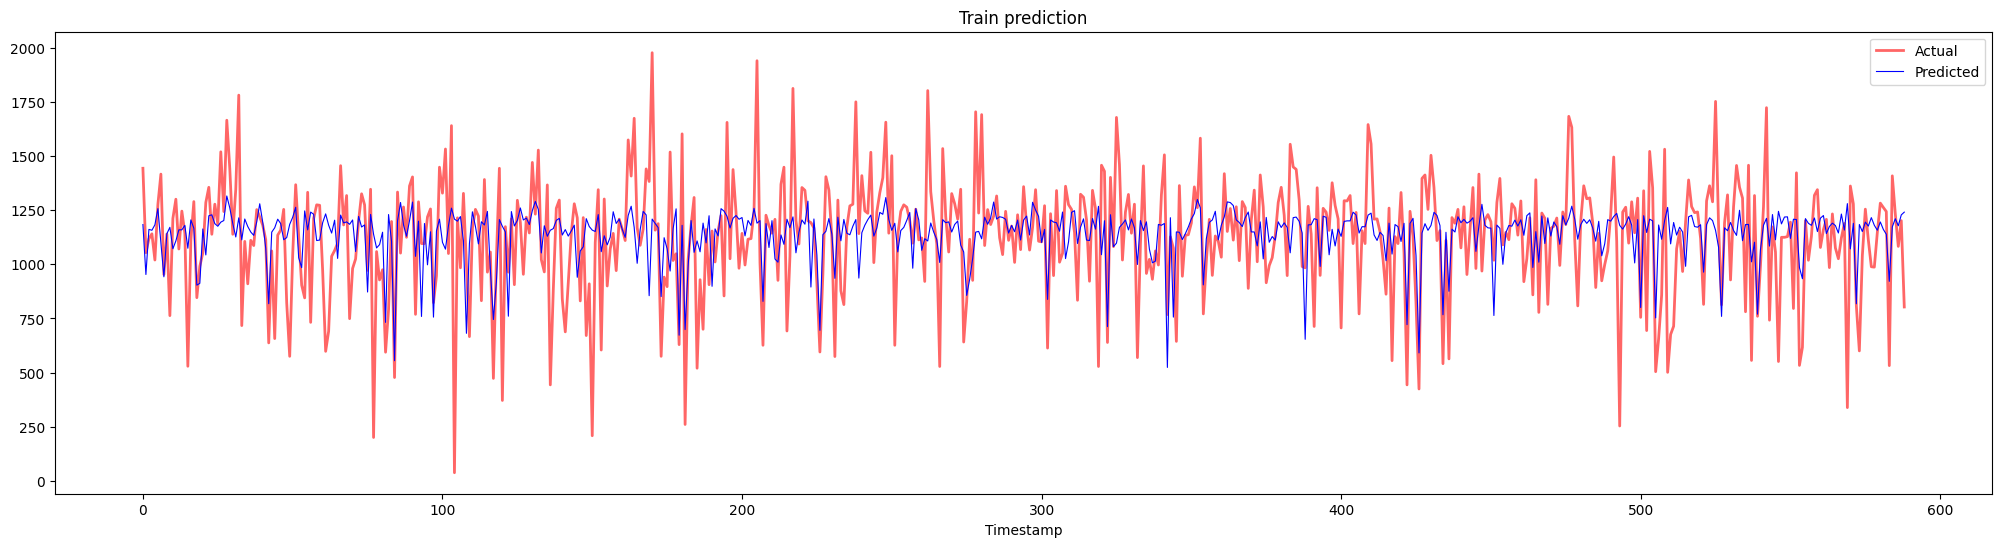

In [91]:
# evaluate train data
train_pred = nfo_model.predict(train_x).reshape(-1,1)
y_train_pred = nfo_scaler.inverse_transform(train_pred)
y_train = nfo_scaler.inverse_transform(train_y)
print("train mape: ", mean_absolute_percentage_error(y_train_pred, y_train))

plt.figure(figsize=(25,6))
plt.plot(range(len(train_x)), y_train, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(train_x)), y_train_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Train prediction")
plt.show()

validate mape:  0.16935726395544254


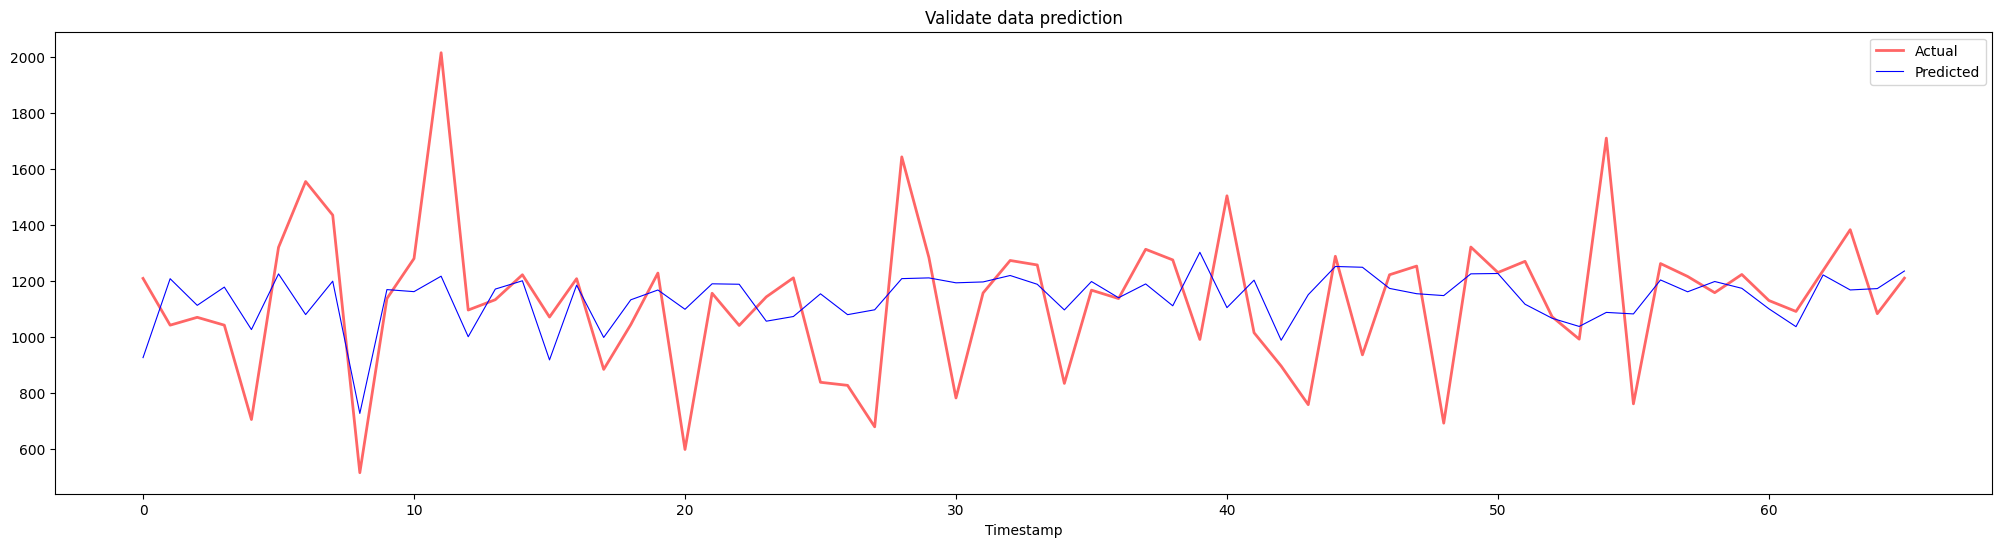

In [92]:
# evaluate validate data
validate_pred = nfo_model.predict(validate_x).reshape(-1,1)
y_validate_pred = nfo_scaler.inverse_transform(validate_pred)
y_validate = nfo_scaler.inverse_transform(validate_y)
print("validate mape: ", mean_absolute_percentage_error(y_validate_pred, y_validate))

plt.figure(figsize=(25,6))
plt.plot(range(len(validate_x)), y_validate, color = 'red', linewidth=2.0, alpha = 0.6)
plt.plot(range(len(validate_x)), y_validate_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("Validate data prediction")
plt.show()

In [93]:
test_data = []
first = french_open_data[2022]
first = first[(first["DATE"] >= "2022-05-01") & (first["DATE"] <= "2022-05-07")]

second = french_open_data[2023]
second = second[(second["DATE"] >= "2023-05-08") & (second["DATE"] <= "2023-05-14")]

days = 7
for i in range(days):
    first_day = first.iloc[i]["COUNT_SCALE"]
    second_day = second.iloc[i]["COUNT_SCALE"]
    test_data.append([first_day, second_day])

test_data = np.array(test_data)
test_data.shape

(7, 2)

[[ 79.15835458]
 [274.34820879]
 [336.16416179]
 [360.21504351]
 [354.10539487]
 [425.38353812]
 [297.87357216]]


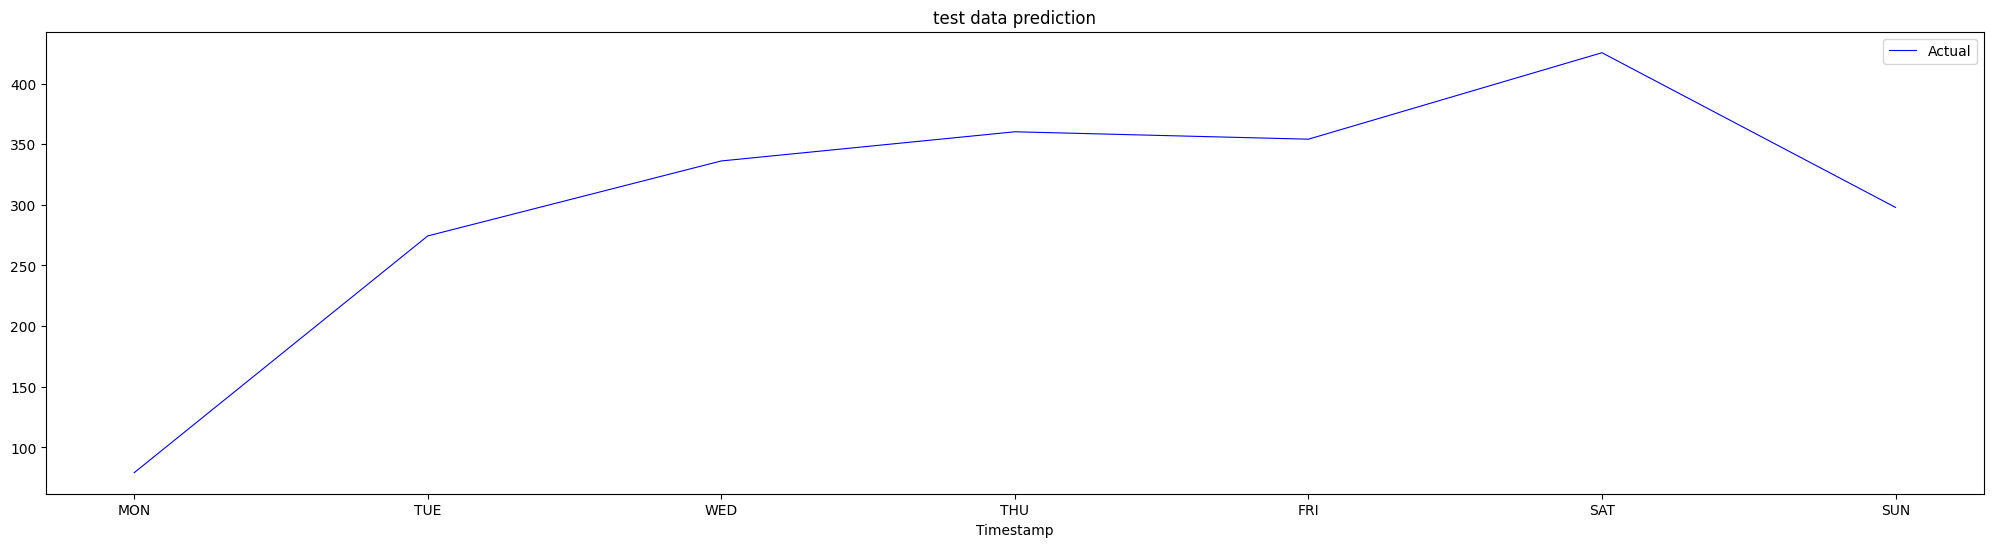

In [94]:
test_pred = nfo_model.predict(test_data).reshape(-1,1)
y_test_pred = nfo_scaler.inverse_transform(test_pred)
print(y_test_pred)
plt.figure(figsize=(25,6))
plt.plot(["MON", "TUE", "WED", "THU", "FRI", "SAT", "SUN"], y_test_pred, color = 'blue', linewidth=0.8)
plt.legend(['Actual','Predicted'])
plt.xlabel('Timestamp')
plt.title("test data prediction")
plt.show()